# for part1
we could analysis **context cell**,**running direction cell** and **place cell**:
the change of the proportion along sessions.
for each file,if not hc session ,we need to know:
1. location 0,1,2 are seperately context [A,B,C]
2. trial num
3. bias
4. accuracy (left choice accuracy, right choice accuracy, context A accuracy, context B accuracy)

we calclulate the number of  
    context cells    
        context 0 cells          
        context 1 cells        
    rd cells    
        context 0 rd cells        
            context 0 rd_0 cells   
            context 0 rd_1 cells   
        context 1 rd cells        
            context 1 rd_0 cells   
            context 1 rd_1 cells   
    pc cells

## index sessions

In [6]:
import glob,os,sys,re
from mylab.Functions import load_pkl
import pandas as pd
import numpy as np

In [15]:
context_map_file = r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\context_map.csv"
context_map = pd.read_csv(context_map_file,skiprows=1)
context_map

,Unnamed: 0,mouse_id,part,session,aim,index,location_0,location_1,location_2,rule_0,rule_1,rule_2
0,0,201033,1,1,hc,00000000-000000,NaN,NaN,NaN,NaN,NaN,NaN
1,1,201033,1,2,adaptation_80cm_CCC,20200721-201748,A,B,C,left,left,left
2,2,201033,1,3,hc,00000000-000000,NaN,NaN,NaN,NaN,NaN,NaN
3,3,201033,1,4,adaptation_80cm_CCC,20200722-144326,A,B,C,left,left,left
4,4,201033,1,5,adaptation_80cm_CCC,20200722-145320,A,B,C,left,left,left
...,...,...,...,...,...,...,...,...,...,...,...,...
289,295,206552,7,11,test,20200906-215046,B,A,C,left,right,none
290,296,206552,7,12,lack_wall,20200906-220951,B2,A2,C,left,right,none
291,297,206552,7,13,hc,00000000-000000,NaN,NaN,NaN,NaN,NaN,NaN
292,298,206552,7,14,test,20200908-172333,B,A,C,left,right,none


In [133]:
files = glob.glob(r"\\10.10.46.135\Lab_Members\_Lab Data Analysis\02_Linear_Track\Miniscope_Linear_Track\batch3\results\celltypes\*.pkl")
files = [i for i in files if "hc" not in i]
files

['\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part1_session2.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part1_session4.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part1_session5.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part1_session7.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part1_session9.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab Data Analysis\\02_Linear_Track\\Miniscope_Linear_Track\\batch3\\results\\celltypes\\cell_type_201033_part2_session11.pkl',
 '\\\\10.10.46.135\\Lab_Members\\_Lab D

In [134]:

def session_descripe(file,context_map):
    """
    output the description of the specified session.
    """
    mouse_id = re.findall("cell_type_(\d+)",file)[0]
    part = re.findall("part(\d+)",file)[0]
    session_num = re.findall("session(\d+).pkl",file)[0]
#     print(type(mouse_id),type(part),type(session_num))
    return context_map[(context_map["mouse_id"]==int(mouse_id))
                      & (context_map["part"]==int(part))
                      & (context_map["session"] == int(session_num))]
    
session_description = func(files[0],context_map)
session_description

,Unnamed: 0,mouse_id,part,session,aim,index,location_0,location_1,location_2,rule_0,rule_1,rule_2
1,1,201033,1,2,adaptation_80cm_CCC,20200721-201748,A,B,C,left,left,left


In [181]:
session_description["mouse_id"].isin(["201033"]).any()

True

In [223]:
def cell_type_1(file,mouseids=["201033"],parts=[1],contexts=[0,1]):
    
    session_description = session_descripe(file,context_map)
    if session_description["mouse_id"].isin(mouseids).any() and session_description["part"].isin(parts).any():        
        c = load_pkl(file)
        
        #context cells in ctx0_1
        context_0_1_cells_context0 = c["contextcells"]["ctx0_1"]["context0_cells"]
        context_0_1_cells_context1 = c["contextcells"]["ctx0_1"]["context1_cells"]
        context_0_1_cells = context_0_1_cells_context0+context_0_1_cells_context1
        context_0_1_cells = ["%s_%s_%s"%(list(session_description["mouse_id"])[0],list(session_description["part"])[0],i) for i in context_0_1_cells]
        #running direction cells in context0 and context1
        rd_0_1_cells_context0_leftcells = c["rdcells"]["context_0"]["left_cells"]
        rd_0_1_cells_context0_rightcells = c["rdcells"]["context_0"]["right_cells"]
        rd_0_1_cells_context1_leftcells = c["rdcells"]["context_1"]["left_cells"]
        rd_0_1_cells_context1_rightcells = c["rdcells"]["context_1"]["right_cells"]
        rd_0_1_cells = rd_0_1_cells_context0_leftcells+rd_0_1_cells_context0_rightcells+rd_0_1_cells_context1_leftcells+rd_0_1_cells_context1_rightcells
        rd_0_1_cells = ["%s_%s_%s"%(list(session_description["mouse_id"])[0],list(session_description["part"])[0],i) for i in rd_0_1_cells]
        #place cells in context0 and context1
        pc_0_1_cells_context0 = c["pccells"]["context_0"]["place_cells"]
        pc_0_1_cells_context1 = c["pccells"]["context_1"]["place_cells"]
        pc_0_1_cells = pc_0_1_cells_context0+pc_0_1_cells_context1
        pc_0_1_cells = ["%s_%s_%s"%(list(session_description["mouse_id"])[0],list(session_description["part"])[0],i) for i in pc_0_1_cells]
        return context_0_1_cells,rd_0_1_cells,pc_0_1_cells
    else:
        return -1,-1,-1
ctxcells,rd_cells,pccells=cell_type_1(files[0],mouseids=["201033"],parts=[1],contexts=[0,1])

result is loaded


result is loaded


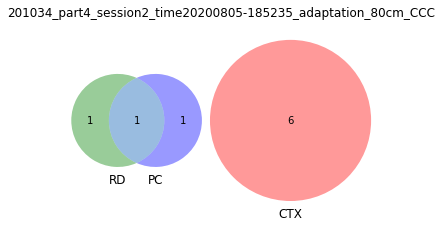

result is loaded


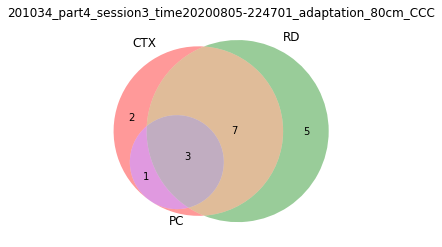

result is loaded


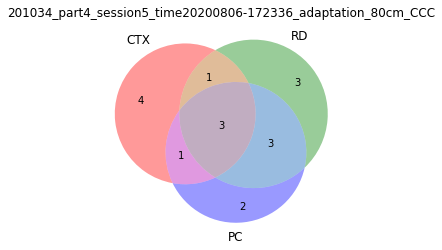

result is loaded


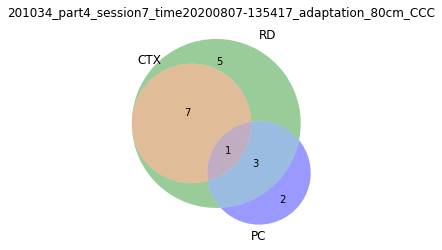

In [227]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn3


for file in files: 
    session_description = session_descripe(file,context_map)
    mouse_id= list(session_description["mouse_id"])[0]
    part = list(session_description["part"])[0]
    session_num = list(session_description["session"])[0]
    index=list(session_description["index"])[0]
    aim=list(session_description["aim"])[0]
    

    
    ctxcells,rd_cells,pccells = cell_type_1(file,mouseids=["201034"],parts=[4],contexts=[0,1])
    
    if not type(ctxcells)== int:
        venn3(subsets=[set(ctxcells),set(rd_cells),set(pccells)],set_labels=("CTX","RD","PC"),set_colors=("r","g","b"))
        plt.title("%s_part%s_session%s_time%s_%s"%(mouse_id,part,session_num,index,aim))
        plt.show()
    

## Cellids of context, running direction and place cells

## generate funtions for plot single cell

In [321]:
Context_Matrix_info = SingleCell_MeanFr_in_SingleTrial_along_Placebin(
    s
    ,df=None
    ,contexts=None
    ,place_bins=list(np.arange(8,50)) # placebins only in context
    ,idxes = None
    ,trials=None)
print(Context_Matrix_info.keys())
plot,plot2 = plot_MeanFr_along_Placebin(Context_Matrix_info)

NameError: name 'SingleCell_MeanFr_in_SingleTrial_along_Placebin' is not defined

In [13]:
s.result.keys()

dict_keys(['ms_ts', 'S_dff', 'sigraw', 'idx_accepted', 'corrected_ms_ts', 'behavevideo', 'behavelog_time', 'behavelog_info', 'behave_track', 'in_context_mask', 'in_context_coords', 'in_lineartrack_mask', 'in_lineartrack_coords', 'Trial_Num', 'process', 'behavevideoframe', 'all_track_points', 'aligned_behave2ms', 'place_bin_No', 'Context'])

### looking through each cell idx by inputing different cellid

In [320]:
idx=5
context=0
plot(idx,context);plot2(idx)

NameError: name 'plot' is not defined

In [6]:
Context_dataframe_info = SingleCell_trace_in_SingleTrial(s,place_bins=list(np.arange(4,53)))


'Context' was there
'Context' was represented as 0,1,2 or -1
'place_bin_No' has been there
Body_speed has been there
screen df according to given contexts


--- Logging error ---
Traceback (most recent call last):
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\logging\__init__.py", line 1029, in emit
    self.flush()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\logging\__init__.py", line 1009, in flush
    self.stream.flush()
FileNotFoundError: [Errno 2] No such file or directory
Call stack:
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\Sabri\Anaconda3\envs\mylab\lib\site-packages\ipykernel\kernelapp.py", line 583, in start
    self.io_loop.start()
  File "C:\Users\Sab

screen df according to given place bins
screen df according to given tirals


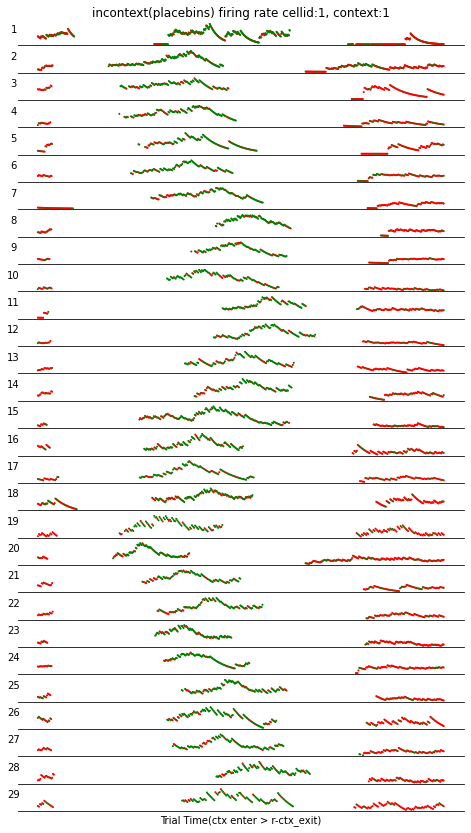

In [7]:
plot=plot_trace_with_running_direction(Context_dataframe_info)

plot(1,1)